## Importing necessary libraries


In [1]:
import pandas as pd  # Data processing and CSV file handling
import numpy as np  # Linear algebra operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting graphs
from sklearn.model_selection import train_test_split  # Splitting the dataset
from sklearn.linear_model import LinearRegression  # Linear Regression Model
from sklearn.metrics import r2_score, mean_squared_error  # Model performance evaluation
import os  # OS-related operations

## Loading the dataset

In [2]:
data = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')  # Load dataset
data.head()  # Display first five rows

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Display dataset information


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Display dataset statistics


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Visualizing relationships using pairplot


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


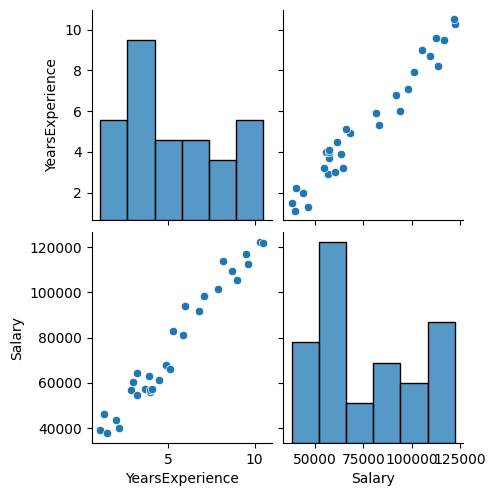

In [5]:
sns.pairplot(data)

## Separating independent (X) and dependent (y) variables

In [6]:
X = data.iloc[:, :-1]  # Feature set (Years of Experience)
y = data.iloc[:, -1]  # Target variable (Salary)

## Splitting data into training and testing sets


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Initializing and training the Linear Regression model


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluating model performance on training and testing data


In [9]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")

Training Score: 0.9495
Testing Score: 0.9816


## Plotting the training set


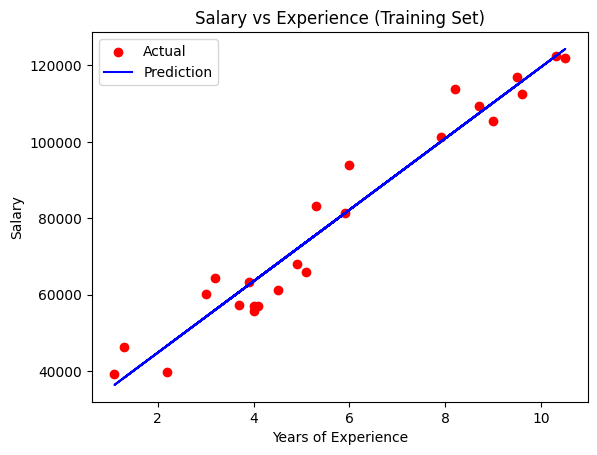

In [10]:
plt.scatter(X_train, y_train, color='red', label='Actual')  # Actual values
plt.plot(X_train, model.predict(X_train), color='blue', label='Prediction')  # Regression line
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Making predictions on test set


In [11]:
y_pred = model.predict(X_test)

## Plotting the test set


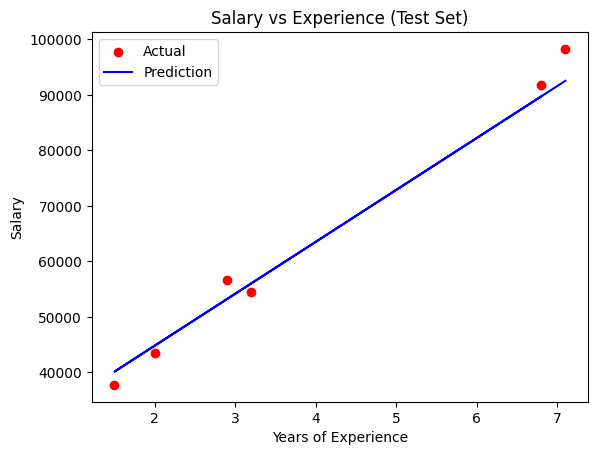

In [12]:
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', label='Prediction')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Comparing actual vs predicted values


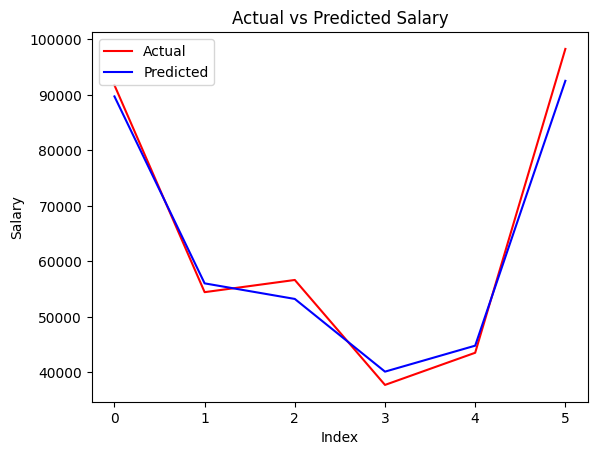

In [13]:
plt.plot(range(len(y_test)), y_test, color='r', linestyle='-', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='b', linestyle='-', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

## Plotting prediction errors


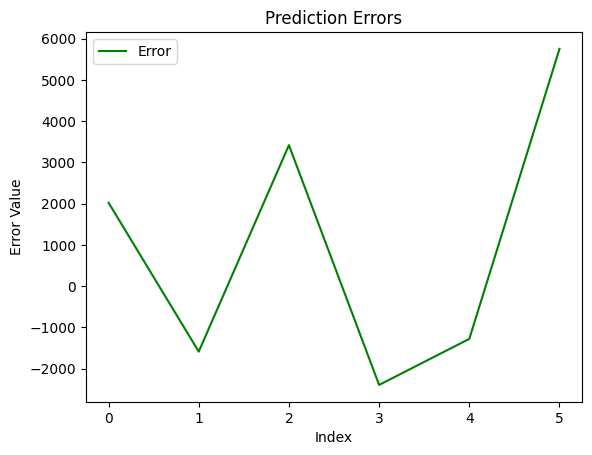

In [14]:
error = y_test - y_pred
plt.plot(range(len(y_test)), error, color='green', linestyle='-', label='Error')
plt.title('Prediction Errors')
plt.xlabel('Index')
plt.ylabel('Error Value')
plt.legend()
plt.show()

## Calculating model performance metrics


In [15]:
mse = mean_squared_error(y_test, y_pred)
rsq = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {rsq:.4f}")

Mean Squared Error: 9785570.1389
R-squared Score: 0.9816


## Displaying model parameters (Intercept and Coefficients)


In [16]:
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient: {model.coef_[0]:.4f}")

Model Intercept: 26089.0966
Model Coefficient: 9356.8630


## Predicting salary for 4.5 years of experience


In [17]:
y_hat = model.predict(pd.DataFrame([[4.5]], columns=X.columns))[0]
print(f"Predicted Salary for 4.5 years of experience: {y_hat:.2f}")

Predicted Salary for 4.5 years of experience: 68194.98
